<a href="https://colab.research.google.com/github/himanshutyagi2020/Tensorflow/blob/main/DeepLearningModels_learningRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Overview:**
1. Input shapes and output shapes
2. X: features/data (inputs)
   y: labels (outputs)
3. Creating custom data to view and fit
4. Steps in modelling
5. Creating a model
6. Compiling a model
7. Defining a loss function
8. Setting up an optimizer
9. Creating evaluation metrics
10. Fitting a model (getting it to find patterns in our data)
11. Evaluating a model
12. Visualizng the model
13. Looking at training curves
14. Compare predictions to ground truth (using our evaluation metrics)
15. Saving a model (so we can use it later)

Download the dataset: Data from Google Drive of dataset was downloaded and extracted. After extraction it was uploaded to BITS Google Drive under /content/gdrive/MyDrive/data1_0.2.csv
Import the required libraries:


 **Summary:**
 Capturing different models to depict the results and we changed a few things
 activation parameter ("relu" & "sigmoid")
 learning_rate (also lr) parameter
 number of epochs
 

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
## Defining the path to the datasets
data_path = "/content/gdrive/MyDrive/data1_0.2.csv"

In [ ]:
# Following libraries will be uploaded to process the data and build model. 
import numpy as np
import pandas as pd

In [ ]:
# Make dataframe of features and labels (naming column1 as feature 1, column2 as feature 2 and 
#column 3 as target/label)
df = pd.read_csv(data_path,names=['feature1', 'feature2', 'label'])

In [ ]:
#check the data shape
df.shape

(765, 3)

In [ ]:
# Missing values check
missing_data = df.isna().sum().sort_values(ascending=False)
percentage_missing = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)
missing_info.style.background_gradient()

,Missing values,Percentage
label,0,0.000000
feature2,0,0.000000
feature1,0,0.000000


In [ ]:
df.head(10)

,feature1,feature2,label
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0
5,-0.493781,-0.339981,0
6,0.505439,0.264136,0
7,0.222880,0.450681,0
8,0.170211,-0.542432,0
9,0.338921,-0.394976,0


In [ ]:
df.tail(10)

,feature1,feature2,label
755,-0.279084,0.183850,1
756,-0.033757,0.346703,1
757,-0.258535,0.274430,1
758,0.321809,-0.717153,1
759,-0.154835,0.209121,1
760,0.218472,0.184996,1
761,-0.097992,-0.302559,1
762,-0.236467,0.212870,1
763,0.745290,-0.210026,1
764,0.248667,0.218322,1


In [ ]:
df.columns

Index(['feature1', 'feature2', 'label'], dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of      feature1  feature2  label
0    0.046000 -0.181767      0
1   -0.516146  0.210068      0
2    0.246368 -0.514901      0
3   -0.176004  0.538347      0
4   -0.540533  0.239300      0
..        ...       ...    ...
760  0.218472  0.184996      1
761 -0.097992 -0.302559      1
762 -0.236467  0.212870      1
763  0.745290 -0.210026      1
764  0.248667  0.218322      1

[765 rows x 3 columns]>

In [ ]:
df['label'].unique()

array([0, 1])

In [ ]:
# Check out the different labels
df.label.value_counts()

0    445
1    320
Name: label, dtype: int64

Alright, looks like we're dealing with a binary classification problem. It's binary because there are only two labels (0 or 1).

If there were more label options (e.g. 0, 1, 2, 3 or 4), it would be called multiclass classification.

Let's take our visualization a step further and plot our data.

In [ ]:
X = df[['feature1', 'feature2']]
y = df['label']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

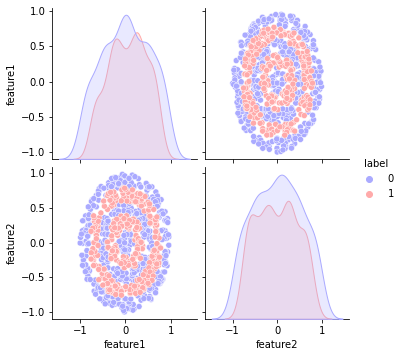

In [ ]:
sns.pairplot(df,hue='label',palette='bwr')

In [ ]:
# Check the shapes of our features and labels
print(X.shape,y.shape)

(765, 2) (765,)


In [ ]:
# Check how many samples we have
print(len(X), len(y))

765 765


In [ ]:
## Following libraries will be uploaded to process the data and build model. 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras import models
from keras import layers

In [ ]:
# Split data into train and test sets
# 70% of the data for the training set
# 30% of the data for the test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(535, 2)

In [ ]:
y_train.shape

(535,)

In [ ]:
X_test.shape

(230, 2)

In [ ]:
y_test.shape

(230,)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
24/24 [==============================] - 0s 1ms/step - loss: 3.0779 - accuracy: 0.2980
Epoch 2/5
24/24 [==============================] - 0s 1ms/step - loss: 2.1999 - accuracy: 0.2497
Epoch 3/5
24/24 [==============================] - 0s 1ms/step - loss: 1.8103 - accuracy: 0.2549
Epoch 4/5
24/24 [==============================] - 0s 1ms/step - loss: 1.6188 - accuracy: 0.1634
Epoch 5/5
24/24 [==============================] - 0s 1ms/step - loss: 1.1290 - accuracy: 0.1595


In [ ]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=100, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

24/24 [==============================] - 0s 989us/step - loss: 0.6790 - accuracy: 0.2366


[0.6790115833282471, 0.2366013079881668]

In [ ]:
# Print
loss, accuracy = model_1.evaluate(X, y)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

24/24 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.2366
Model loss on the test set: 0.6790115833282471
Model accuracy on the test set: 23.66%


In [ ]:
#What if we added an extra layer and trained for a little longer?
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4), # add an extra layer
  tf.keras.layers.Dense(8) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

24/24 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.0000e+00


[0.6794437766075134, 0.0]

In [ ]:
# Print
loss, accuracy = model_2.evaluate(X, y)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

24/24 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.0000e+00
Model loss on the test set: 0.6794437766075134
Model accuracy on the test set: 0.00%


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,), 
  tf.keras.layers.Dense(8),
  tf.keras.layers.Dense(12)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

In [ ]:
# Evaluate the model
model_3.evaluate(X, y)

24/24 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.0039


[0.6806076765060425, 0.003921568859368563]

In [ ]:
# Print
loss, accuracy = model_3.evaluate(X, y)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

24/24 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.0039
Model loss on the test set: 0.6806076765060425
Model accuracy on the test set: 0.39%


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


24/24 [==============================] - 0s 1ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 6.4523 - accuracy: 0.5817
Epoch 11/100
24/24 [=

In [ ]:
# Evaluate the model
model_4.evaluate(X, y)

24/24 [==============================] - 0s 1ms/step - loss: 6.4523 - accuracy: 0.5817


[6.452265739440918, 0.5816993713378906]

In [ ]:
# Print
loss, accuracy = model_4.evaluate(X, y)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

24/24 [==============================] - 0s 937us/step - loss: 6.4523 - accuracy: 0.5817
Model loss on the test set: 6.452265739440918
Model accuracy on the test set: 58.17%


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(12, activation=tf.keras.activations.relu), # hidden layer 3,12 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 1.4186 - accuracy: 0.5817
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9733 - accuracy: 0.5817
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8507 - accuracy: 0.5778
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7884 - accuracy: 0.5412
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.5294
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7374 - accuracy: 0.5386
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7246 - accuracy: 0.5438
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7147 - accuracy: 0.5359
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.5294
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7030 - accuracy: 0.5320
Epoch 11/100
24/24 [=

In [ ]:
# Evaluate the model
model_5.evaluate(X, y)

24/24 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.5830


[0.617352306842804, 0.5830065608024597]

In [ ]:
# Print
loss, accuracy = model_5.evaluate(X, y)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

24/24 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.5830
Model loss on the test set: 0.617352306842804
Model accuracy on the test set: 58.30%


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 2, 8 neurons, ReLU activation
  tf.keras.layers.Dense(12, activation=tf.keras.activations.relu), # hidden layer 3,12 neurons, ReLU activation
  tf.keras.layers.Dense(16, activation=tf.keras.activations.relu), # hidden layer 4,16 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


24/24 [==============================] - 1s 1ms/step - loss: 1.0126 - accuracy: 0.5660
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 0.7822 - accuracy: 0.5399
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.5477
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 0.7152 - accuracy: 0.5333
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 0.7058 - accuracy: 0.5438
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.5229
Epoch 7/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5556
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5817
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5817
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5817
Epoch 11/200
24/24 [=

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

24/24 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7203


[0.48059481382369995, 0.7202614545822144]

In [ ]:
# Print
loss, accuracy = model_6.evaluate(X, y)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

24/24 [==============================] - 0s 999us/step - loss: 0.4806 - accuracy: 0.7203
Model loss on the test set: 0.48059481382369995
Model accuracy on the test set: 72.03%


Text(0.5, 1.0, 'Model_6 training curves')

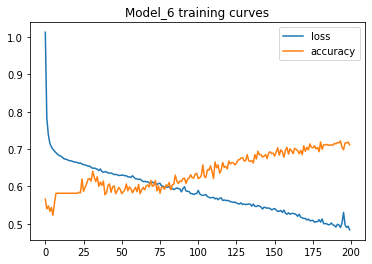

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_6 training curves")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_6)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X_train, y_train, epochs=500)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
17/17 [==============================] - 1s 2ms/step - loss: 0.6863 - accuracy: 0.5570
Epoch 2/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5776
Epoch 3/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5776
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5776
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5776
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.5776
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5776
Epoch 8/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.5776
Epoch 9/500
17/17 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.5776
Epoch 10/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.5776
Epoch 11/

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8261
Model loss on the test set: 0.34212231636047363
Model accuracy on the test set: 82.61%


Text(0.5, 1.0, 'Model_7 training curves')

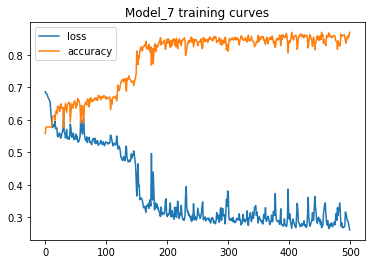

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 training curves")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_7)
model_8 = tf.keras.Sequential([
   tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss="binary_crossentropy", 
              optimizer="Adam", 
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_8.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])



Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 0.7035 - accuracy: 0.4280 - lr: 1.0000e-04
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.4187 - lr: 1.1220e-04
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.4131 - lr: 1.2589e-04
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.4766 - lr: 1.4125e-04
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4953 - lr: 1.5849e-04
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5196 - lr: 1.7783e-04
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5178 - lr: 1.9953e-04
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5065 - lr: 2.2387e-04
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss:

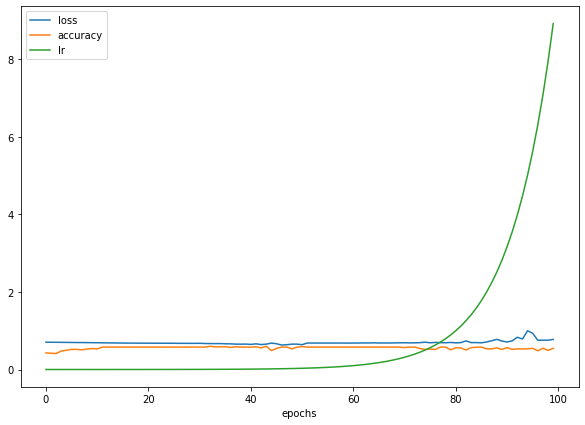

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

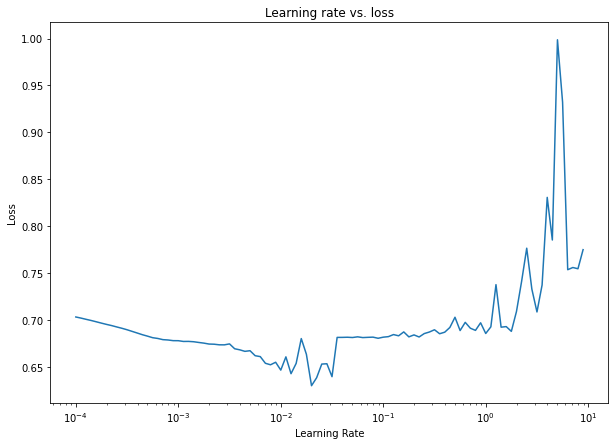

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
   tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation
   tf.keras.layers.Dense(4, activation="relu"),
  #tf.keras.layers.Dense(12, activation="relu"),
  #tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model with the ideal learning rate
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, we need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 1000 epochs
history = model_9.fit(X_train, y_train, epochs=500)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
17/17 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5589
Epoch 2/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5776
Epoch 3/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5776
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5738
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.5664
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.5832
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.5850
Epoch 8/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.5869
Epoch 9/500
17/17 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.5701
Epoch 10/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6336
Epoch 11/

In [ ]:
# Evaluate model on the test dataset
model_9.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.7913


[0.3966427743434906, 0.791304349899292]

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.7913
Model loss on test set: 0.3966427743434906
Model accuracy on test set: 79.13%


Text(0.5, 1.0, 'Model_9 training curves')

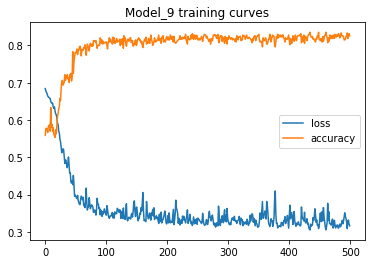

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 training curves")